# Run the whole deltas algorithm

In [46]:
%load_ext autoreload
%autoreload 2

import ipywidgets
import deltas.pipeline.run as run
import deltas.model_deltas as model_deltas
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [47]:
N1 = 10000
N2 = 10
# Gaussian (not always seperable)
# data_clf = run.get_data(
#     m1=[-2, -2],
#     m2=[2, 2],
#     cov1=[[1, 0], [0, 1]],
#     cov2=[[1, 0], [0, 1]],
#     N1=N1,
#     N2=N2,
#     scale=False
#     )
# fixed data set
# data_clf = run.get_sep_data(
data_clf = run.get_synthetic_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


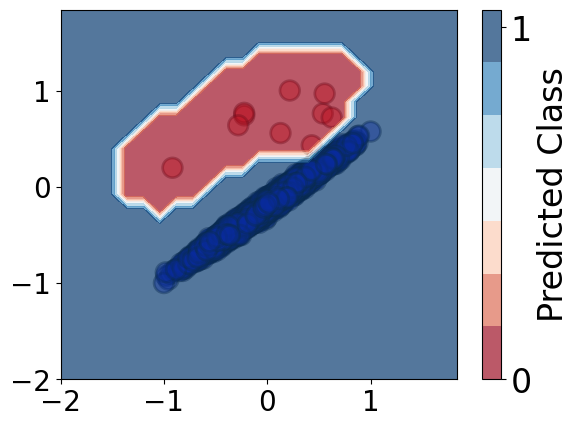

SMOTE


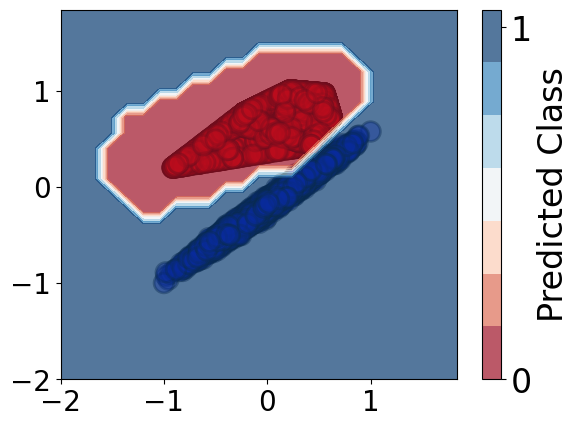

In [48]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

data_clf['clf'], clf_SMOTE = run.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [49]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[0.01682419]])

## Fit deltas

deltas init: [1, 0.998951764065479]
eq. 7 can be satisfied: True
constraint init: False
Solution not possible so ignoring contraint and using decoupled loss function for each delta
Contraint not possible so used uncoupled delta grid Search Optimisation
    delta1 : 1e-15 
    delta2: 1e-15
    constraint satisfied: False


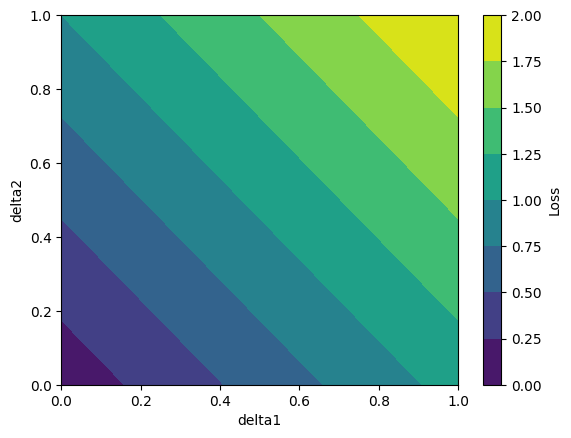

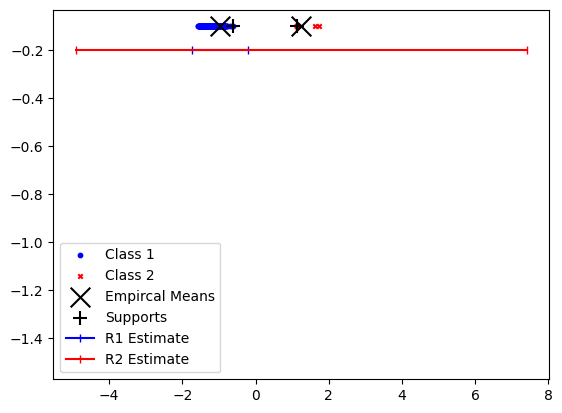

In [50]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.base_deltas(clf).fit(X, y, _print=True, _plot=True)

## Plot training data information

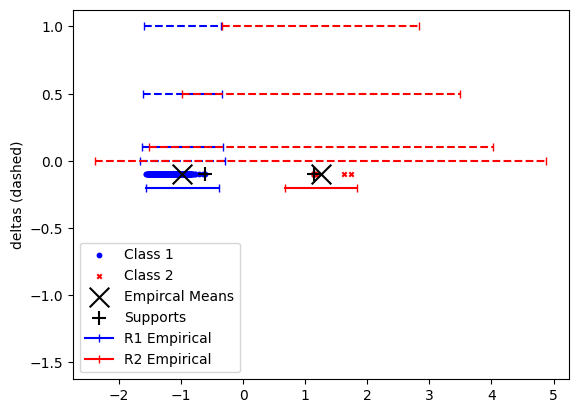

In [51]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [52]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [53]:
deltas_model.print_params()

Parameters
                R:  1.7393764925448016
                N1: 10000
                N2: 10
                R1: 0.5825607526754891
                R2: 0.48711352411795183
                M:  1.7539112812787745
                D:  2.2297314726545663
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.9608
deltas accuracy: 0.5
SMOTE accuracy: 0.976

original F1: 0.9592006661115737
deltas F1: 0.6666666666666666
SMOTE F1: 0.9754098360655737

original precision0: 0.9272997032640949
deltas precision0: 0.0
SMOTE precision0: 0.9541984732824428

original precision1: 1.0
deltas precision1: 0.5
SMOTE precision1: 1.0



/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


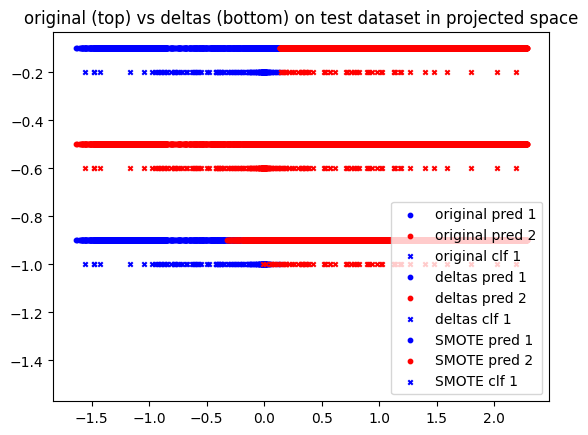

original


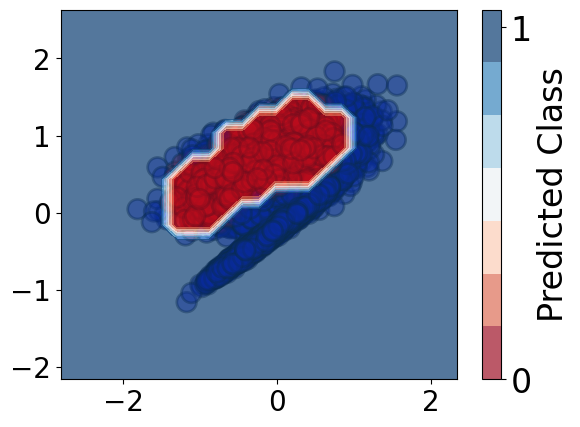

deltas


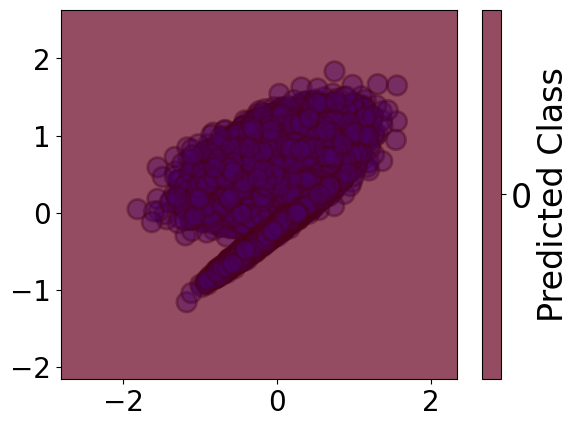

SMOTE


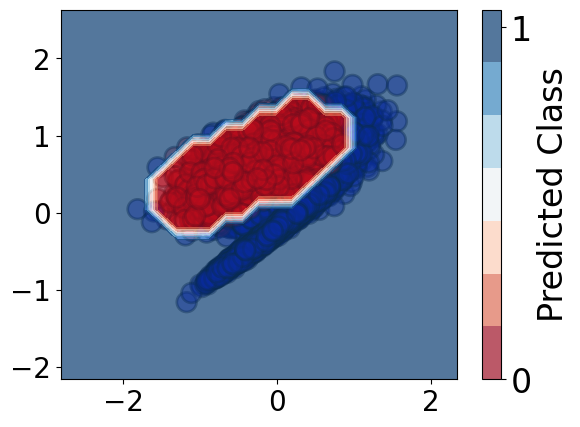

In [54]:
mdels = {
    'original': clf,
    'deltas': deltas_model,
    'SMOTE': clf_SMOTE,
         }
run.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)